In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq

In [2]:
from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

pio.templates.default = "plotly_white"

In [4]:
mmult = 4
mpad = mmult

dt = 0.1/mmult
T = 100./mmult
N = int(T/dt)


In [5]:
projnames = ['x', 'y', 'z']
npeaks = [0, 1]

In [6]:
from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [8]:
# in a distant future all tables are merged into one
t = pd.DataFrame({
    'fx0':[1], 'fy0':[1.5], 'fz0':[2],
    'fx1':[2], 'fy1':[2], 'fz1':[1],
    'Ax0':[1], 'Ay0':[0.6], 'Az0':[0.5],
    'Ax1':[0], 'Ay1':[0], 'Az1':[0],
    'px0':[0], 'py0':[1/2], 'pz0':[0],
    'px1':[0], 'py1':[1/2], 'pz1':[0],
})

In [9]:
def build_orbit(row, tt, pos):
    for c in projnames:  # x, y, z
        pos[c] = 0
        for i in npeaks:  # 
            A, f, ph = row[f"A{c}{i}"], row[f"f{c}{i}"], row[f"p{c}{i}"]
            pos[c] += A*np.cos(2*np.pi*tt*f + np.pi*ph)
    return pos

In [10]:
def make_periodograms(x,y, mpad=mpad):
    R = (x**2 + y**2)
    PR = np.abs(fft(R, n=mpad*len(R)))
    Px = np.abs(fft(pos['x'], n=mpad*len(R)))
    Py = np.abs(fft(pos['y'], n=mpad*len(R)))
    return PR, Px, Py

In [11]:
mathdict = {'f':r"\nu", 'A': 'A', 'p': r'\varphi'}

def make_math_label(l):
    par, coord, i = l
    return '$' + mathdict[par] +'_' + coord + '^' + '{(' + i + ')}' +'$'

In [12]:
unicdict = {
    'f': "ν", 'A': 'A', 'p': 'φ'
}

def make_html_label(l):
    par, coord, i = l
    return unicdict[par] + \
        '<sub>' + coord + '</sub>' + \
        '<sup>' + i + '</sup>'

In [13]:
tt = np.arange(0, T, dt)
pos = pd.DataFrame(np.zeros(shape=(len(tt), 3)), columns=['x', 'y', 'z'])

In [14]:
ff = fftfreq(mpad*len(tt), dt)
R = (pos['x']**2 + pos['y']**2)

In [16]:
fig = make_subplots(rows=2, cols=3, 
                    specs=[[{}, {}, {}], [{"colspan": 3}, None, None]])

fig.add_trace(go.Scatter(x=pos['x'], y=pos['y'],
                           line=dict(width=3, color='darkblue'),
                           showlegend=False),
              row=1, col=1)
fig.add_trace(go.Scatter(x=pos['x'], y=pos['z'],
                           line=dict(width=3, color='darkblue'),
                           showlegend=False),
              row=1, col=2)
fig.add_trace(go.Scatter(x=pos['y'], y=pos['z'],
                           line=dict(width=3, color='darkblue'),
                           showlegend=False),
              row=1, col=3)

fig.add_trace(go.Scatter(x=ff, y=np.abs(fft(R)),name='PR'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=ff, y=np.abs(fft(pos['x'])), name='Px'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=ff, y=np.abs(fft(pos['y'])), name='Py'),
              row=2, col=1)

# equal scale
fig.update_layout(
    yaxis=dict(scaleanchor="x", scaleratio=1),
    yaxis2=dict(scaleanchor="x2", scaleratio=1),
    yaxis3=dict(scaleanchor="x3", scaleratio=1),
    xaxis4=dict(range=[-5,5]),
    legend = dict(orientation='h')
)
fig
fw = go.FigureWidget(fig)

/home/iliya/.local/lib/python3.8/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning:

Series.flags is deprecated and will be removed in a future version



In [17]:
widgs = dict()

def setup_sliders(*sliders, deschook=None, **kw):
    for sl in sliders:
        desc = make_html_label(sl) if deschook is None else deschook(make_html_label(sl))
        widgs[sl] = widgets.FloatSlider(description = desc,
                                        value=t.loc[0,sl], **kw)

In [18]:
setup_sliders('fx0', 'fx1', 'fy0', 'fy1', 
              min=0, max=10, step=0.001, readout_format='.3f')
setup_sliders('Ax0', 'Ax1', 'Ay0', 'Ay1',
              min=0, max=2, step=0.01)
setup_sliders('px0', 'px1', 'py0', 'py1', deschook=lambda x: x + " / π",
              min=-1, max=1, step=0.01)

ui = widgets.HBox([
    widgets.VBox([widgs['fx0'], widgs['fx1'], widgs['fy0'], widgs['fy1']]),
    widgets.VBox([widgs['Ax0'], widgs['Ax1'], widgs['Ay0'], widgs['Ay1']]),
    widgets.VBox([widgs['px0'], widgs['px1'], widgs['py0'], widgs['py1']]),
])


def update(ch):
    with fw.batch_update():
        widgs['fy0'].value = widgs['fx0'].value
        widgs['fy1'].value = widgs['fx1'].value
        
        #widgs['Ay0'].value = widgs['Ax0'].value
        #widgs['Ay1'].value = widgs['Ax1'].value
        
        # modifying source table to save a state on reruns
        for k,v in widgs.items():
            t.loc[0, k] = v.value
        build_orbit(t.loc[0], tt, pos)
        fw.data[0].x = pos['x']
        fw.data[0].y = pos['y']
        
        #fw.data[1].x = pos['x']
        #fw.data[1].y = pos['z']
        
        #fw.data[2].x = pos['x']
        #fw.data[2].y = pos['z']
        
        PR, Px, Py = make_periodograms(pos['x'], pos['y'])
        fw.data[3].y = PR
        fw.data[3].x /= 2
        fw.data[4].y = Px
        fw.data[5].y = Py
        #fw.layout.shapes[0].x0 = fx + fy
        #fw.layout.shapes[0].x1 = fx + fy

for k,v in widgs.items():
    widgs[k].observe(update, names="value")

update("whatever")
display(ui,fw)

FigureWidget({
    'data': [{'line': {'color': 'darkblue', 'width': 3},
              'showlegend': False,
   …

In [35]:
from IPython.display import HTML

HTML('''<script>
 $('div.input').hide();
</script>
''')

In [40]:
1**2/2

0.5

In [39]:
0.7*0.50

0.35

In [24]:
fw

FigureWidget({
    'data': [{'line': {'color': 'darkblue', 'width': 3},
              'showlegend': False,
   …

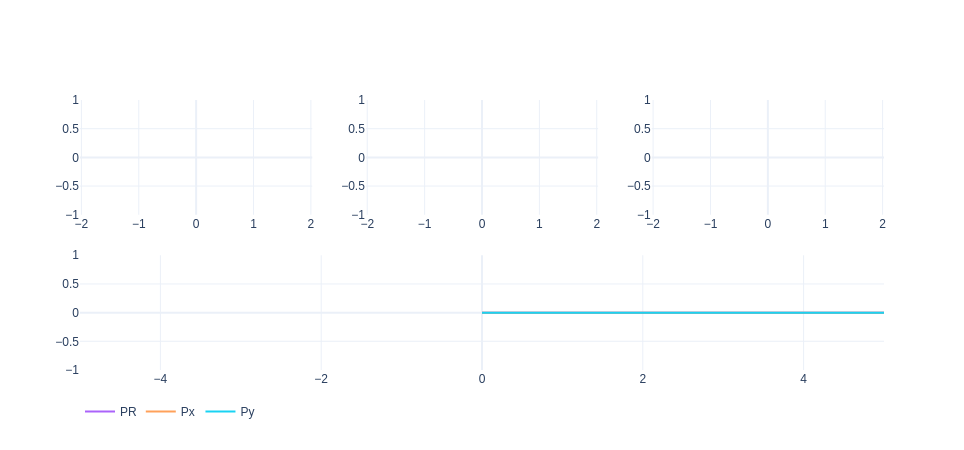

In [26]:
fig

In [27]:
t

,fx0,fy0,fz0,fx1,fy1,fz1,Ax0,Ay0,Az0,Ax1,Ay1,Az1,px0,py0,pz0,px1,py1,pz1
0,1,1.5,2,2,2,1,1,0.6,0.5,0,0,0,0,0.5,0,0,0.5,0


In [30]:
import numpy as np

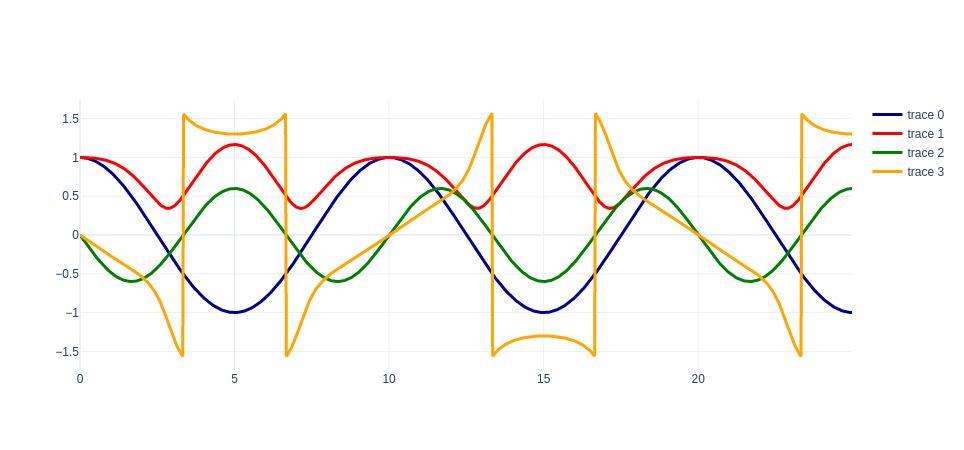

In [19]:
t.fx0 = 0.1
t.fy0 = 0.15
t.py0 = 0.5
build_orbit(t.loc[0], tt, pos)
R = np.sqrt(pos['x']**2 + pos['y']**2)
go.Figure([
    go.Scatter(x=tt, y=pos['x'],
               line=dict(width=3, color='darkblue')),
    go.Scatter(x=tt, y=R,
               line=dict(width=3, color='red')),
    go.Scatter(x=tt, y=pos['y'],
               line=dict(width=3, color='green')),
    go.Scatter(x=tt, y=np.arctan2(pos['y'], pos['x'])/2,
               line=dict(width=3, color='orange'))
])

In [206]:
t.fx0 = 1
t.fy0 = 1
t.fx1 = 0.2
t.fy1 = 0.2

t.px1 = 0.1
t.py0 = -0.5
t.py1 = 0.5
t.Ax0 = 1
t.Ay0 = 1
t.Ax1 = 0.6*t.Ax0
t.Ay1 = 0.6*t.Ay0

build_orbit(t.loc[0], tt, pos)
N = 200
frames = [go.Frame(
        data = [go.Scatter(
            x=[pos['x'][n*k]], y=[pos['y'][n*k]],
            mode="markers",
            marker=dict(color="red", size=10)
        )]) for k in range(N)]

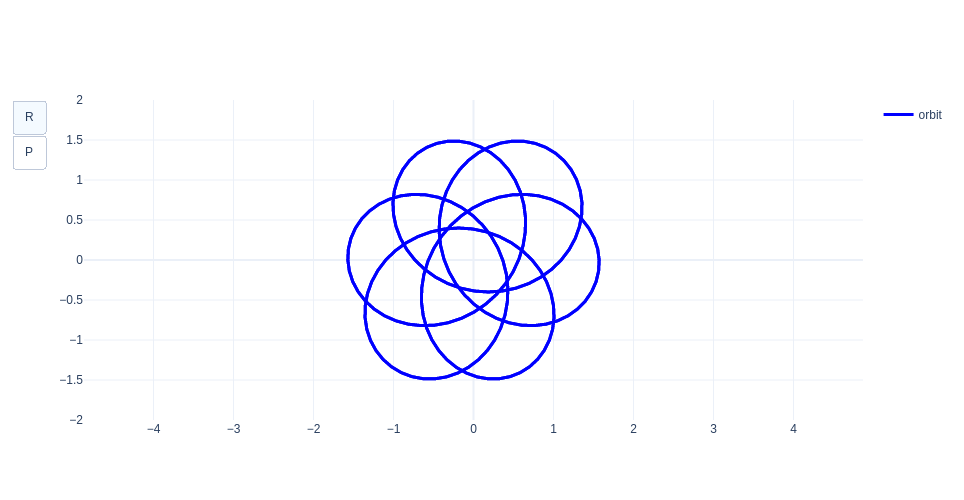

In [207]:
fig=go.Figure(
    data = [
        go.Scatter(
            x = pos['x'], y = pos['y'], showlegend=False,
            line=dict(width=3, color="blue")
        ), 
        go.Scatter(
            x = pos['x'], y = pos['y'], name='orbit',
            line=dict(width=3, color="blue")
        )], 
    layout = go.Layout(
        autosize = False, width=500, height=500,
        xaxis = dict(range=[-2, 2], autorange=False),
        yaxis = dict(range=[-2, 2], scaleanchor="x", scaleratio=1,  autorange=False),
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="R",
                                        method="animate",
                                        args=[None, {"frame": {"duration": 0, "redraw": False},
                                                     "fromcurrent": True, "transition": {
                                                         "duration": 1000,
                                                         "easing": "linear"}}]),
                                   dict(label="P", 
                                        method="animate",
                                        args=[[None], dict(mode="immediate")])])]
    ),
    frames = frames
)
fig.show()

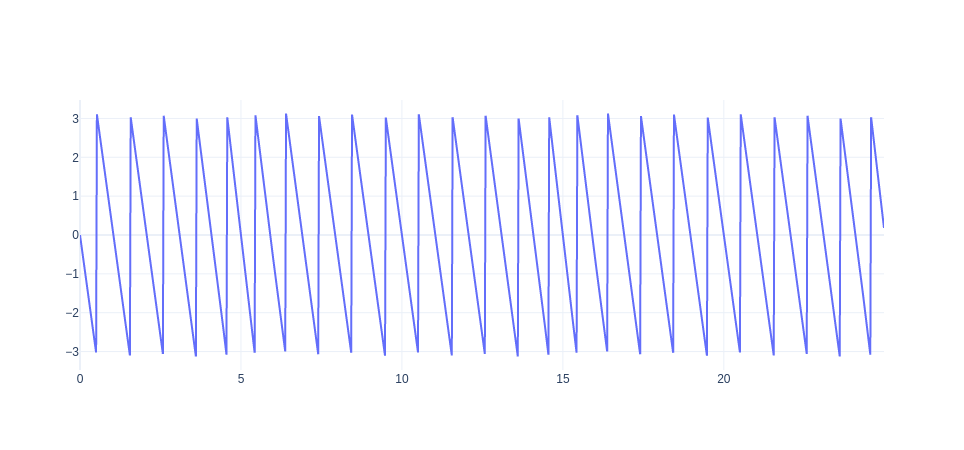

In [132]:
t.fx1 = 0.9
t.fy1 = 0.9

t.py0 = 0.5
t.py1 = 0.5
go.Figure([
    go.Scatter(x=tt, y=np.arctan2(pos['y'], pos['x']))
])

In [201]:
alpha = np.pi/((1+0.2)/2)
print(np.degrees(alpha))
np.degrees(np.arctan2(-np.sin(alpha), np.cos(alpha)))

300.0


59.99999999999999